In [67]:
# setup the matplotlib graphics library and configure it to show figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [68]:
# make qutip available in the rest of the notebook
from qutip import *

In [137]:
wc = 1.0  * 2 * np.pi  # photon frequency
we = 1.0  * 2 * np.pi  # exciton frequency

Np = 20            # number of cavity fock states
Ne = 10            # number of exciton fock states
use_rwa = True

In [166]:
# operators
a  = tensor(destroy(Np), qeye(Ne))
b = tensor(qeye(Np), destroy(Ne))

ne = b.dag() * b  # exciton
nc = a.dag() * a  # photon

A = 1
B = -0.1

# decoupled Hamiltonian
H0 = wc * a.dag() * a + we * b.dag() * b

# interaction Hamiltonian
if use_rwa:
    H1 = (a.dag() * b + a * b.dag()) + A*(b.dag()*b.dag()*b*b) + B*(b.dag()*b.dag()*b*a + a.dag()*b.dag()*b*b)
else:
    H1 = (a.dag() + a) * (b + b.dag())

In [167]:
g_vec = np.linspace(0, 3.0, 101) * 2 * np.pi # coupling strength vector

psi_list = []

for g in g_vec:

    H = H0 + g * H1

    # find the groundstate and its energy
    evals, ekets = H.eigenstates()
    gnd_state = ekets[0]
    
    # store the ground state
    psi_list.append(gnd_state)

In [168]:
ne_expt = expect(ne, psi_list) # exciton occupation probability
nc_expt = expect(nc, psi_list) # photon occupation probability

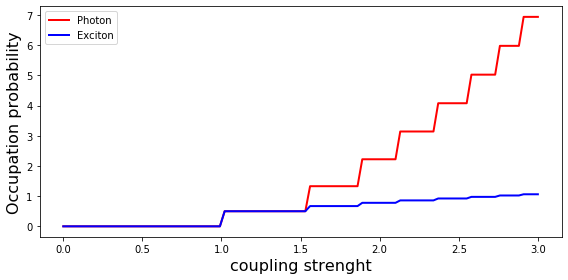

In [169]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(g_vec/(2*np.pi), nc_expt, 'r', linewidth=2, label="Photon")
axes.plot(g_vec/(2*np.pi), ne_expt, 'b', linewidth=2, label="Exciton")
axes.set_ylabel("Occupation probability", fontsize=16)
axes.set_xlabel("coupling strenght", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()